In [ ]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
# Ensemble learning models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
# Model evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd



from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


import joblib 
## for bert language model
#import transformers
import spacy
from collections import Counter



import tensorflow as tf
import re
import random
from nltk.stem import PorterStemmer
from string import punctuation
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
import time

%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False
# nltk.download('twitter_samples')





from google.colab import drive
drive.mount('/content/drive')
prefix = 'drive/MyDrive/Hisham_Ignacio/ICMS_ML/'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


## Tf-Idf (advanced variant of BoW)
#vectorizer = feature_extraction.text.TfidfVectorizer(vocabulary=total_dict, ngram_range=(1,2))

# plot histogram
def histo(df):
  fig, ax = plt.subplots(figsize=(25, 15))
  fig.suptitle("y", fontsize=12)
  df["Cat"].reset_index().groupby("Cat").count().sort_values(by= "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
  plt.show()


# remove under-represented categories
def cat_size(df, cat_size):
  if cat_size is not None:
    df_minimal=df.groupby(['Cat']).filter(lambda x: len(x) >= cat_size)
  return df_minimal



In [ ]:
df = joblib.load(prefix+'ICMS_dataset_revised.joblib') 
Cat = {i:x for i,x in enumerate(df.ICMS.astype('category').cat.categories)}
#y = df.Cat.astype('int')

print ("size before")
print (df.shape)

 # Remove repeated rows
df.drop_duplicates(inplace = True)
   
    # For rows with identical reviews - retain only first
df.drop_duplicates(subset = ['Description'], keep = 'first', inplace = True)

    # Create mask
missing_description = df.Description.isna()
df = df[~missing_description]
    
print ("size after")
print (df.shape)


#Generate the category codes from the ICMS codes
df['Cat'] = df.ICMS.astype('category').cat.codes
#df.drop_duplicates()


#df["comment_list"] = df["Description"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
y = df.Cat.astype('int')

#df["comment_list_new"] = clean_text_data(df)

df.head()

size before
(123924, 2)
size after
(53320, 2)


,Description,ICMS,Cat
0,Filter Drains - Diameter <300mm,1.06.020,31
1,Filter Drains - Diameter >=300 but <450mm,1.06.020,31
2,Filter Drains - Diameter >=450mm,1.06.020,31
3,Filter Drains - Sub-base material,1.06.020,31
4,Filter Drains - Lightweight aggregate infill,1.06.020,31


In [ ]:
df= joblib.load(prefix+'df_clean.joblib')
df=cat_size(df, 250)
index_names = df[ df['Cat'] == 50 ].index
df.drop(index_names, inplace = True)

In [ ]:


y = df.Cat.astype('int')
X=df["comment_list_new"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape)


X_train=X_train.to_frame()
X_test=X_test.to_frame()


X_train = list(X_train.comment_list_new)
X_test = list(X_test.comment_list_new)


(40595,) (10149,) (40595,) (10149,) (50744,) (50744,)


In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dropout, MaxPool1D, Flatten, Dense, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate


# Define a function to compute the max length of sequence
def max_length(sequences):
    '''
    input:
        sequences: a 2D list of integer sequences
    output:
        max_length: the max length of the sequences
    '''
    max_length = 0
    for i, seq in enumerate(sequences):
        length = len(seq)
        if max_length < length:
            max_length = length
    return max_length




In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"

# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

print("Example of sentence: ", X_train[4])

# Turn the text into sequence
training_sequences = tokenizer.texts_to_sequences(X_train)
max_len = max_length(training_sequences)

print('Into a sequence of int:', training_sequences[4])

# Pad the sequence to have the same size
training_padded = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
print('Into a padded sequence:', training_padded[4])

Example of sentence:  remove tip site internal diameter duct fix ground underbridge carriageway ground level
Into a sequence of int: [28, 50, 29, 13, 6, 30, 142, 172, 540, 40, 172, 140]
Into a padded sequence: [ 28  50  29  13   6  30 142 172 540  40 172 140   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0]


# Bidirectional GRU

In [ ]:
def define_model(filters = 100, kernel_size = 3, activation='relu', input_dim = None, output_dim=300, max_length = None ):
  
    # Channel 1
    input1 = Input(shape=(max_length,))
    embeddding1 = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_length)(input1)
    conv1 = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                   kernel_constraint= MaxNorm( max_value=3, axis=[0,1]))(embeddding1)
    pool1 = MaxPool1D(pool_size=2, strides=2)(conv1)
    flat1 = Flatten()(pool1)
    drop1 = Dropout(0.5)(flat1)
    dense1 = Dense(20, activation='relu')(drop1)
    drop1 = Dropout(0.5)(dense1)
    out1 = Dense(units=20, activation='softmax')(drop1)
    
    # Channel 2
    input2 = Input(shape=(max_length,))
    embeddding2 = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_length, mask_zero=True)(input2)
    gru2 = Bidirectional(GRU(64))(embeddding2)
    drop2 = Dropout(0.5)(gru2)
    out2 = Dense(units=20, activation='softmax')(drop2)
    
    # Merge
    merged = concatenate([out1, out2])
    
    # Interpretation
    outputs = Dense(units=44, activation='softmax')(merged)
    model = Model(inputs=[input1, input2], outputs=outputs)
    
    # Compile
    model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model


def define_model2(filters = 100, kernel_size = 3, activation='relu', input_dim = None, output_dim=300, max_length = None ):
  
    # Channel 1
    input1 = Input(shape=(max_length,))
    embeddding1 = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_length)(input1)
    conv1 = Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', 
                   kernel_constraint= MaxNorm( max_value=3, axis=[0,1]))(embeddding1)
    pool1 = MaxPool1D(pool_size=2, strides=2)(conv1)
    flat1 = Flatten()(pool1)
    drop1 = Dropout(0.5)(flat1)
    dense1 = Dense(20, activation='relu')(drop1)
    drop1 = Dropout(0.5)(dense1)
    out1 = Dense(units=51, activation='softmax')(drop1)
    
  
    
    # Merge
    merged = out1
    
    # Interpretation
    outputs = Dense(units=51, activation='softmax')(out1)
    model = Model(inputs=[input1], outputs=outputs)
    
    # Compile
    model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model



def define_model_biGRU(filters = 100, kernel_size = 3, activation='relu', input_dim = None, output_dim=300, max_length = None ):
  
  
    
    # Channel 2
    input2 = Input(shape=(max_length,))
    embeddding2 = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_length, mask_zero=True)(input2)
    gru2 = Bidirectional(GRU(100))(embeddding2)
    drop2 = Dropout(0.5)(gru2)
    out2 = Dense(units=44, activation='softmax')(drop2)
    
    # Merge
    merged = out2
    
    # Interpretation
    outputs = Dense(units=44, activation='softmax')(out2)
    model = Model(inputs=input2, outputs=outputs)
    
    # Compile
    model.compile( loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model



In [ ]:
model_0 = define_model( input_dim=300, max_length=165)
model_0.summary()

# TCN Ready

In [ ]:
df = joblib.load(prefix+'ICMS_dataset_revised.joblib') 
Cat = {i:x for i,x in enumerate(df.ICMS.astype('category').cat.categories)}
#y = df.Cat.astype('int')

print ("size before")
print (df.shape)

 # Remove repeated rows
df.drop_duplicates(inplace = True)
   
    # For rows with identical reviews - retain only first
df.drop_duplicates(subset = ['Description'], keep = 'first', inplace = True)

    # Create mask
missing_description = df.Description.isna()
df = df[~missing_description]
    
print ("size after")
print (df.shape)


#Generate the category codes from the ICMS codes
df['Cat'] = df.ICMS.astype('category').cat.codes
#df.drop_duplicates()


#df["comment_list"] = df["Description"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
y = df.Cat.astype('int')

size before
(123924, 2)
size after
(53320, 2)


In [ ]:
df=cat_size(df, 250)
index_names = df[ df['Cat'] == 50 ].index
df.drop(index_names, inplace = True)

In [ ]:
y = df.Cat.astype('int')
X=df["Description"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape)


X_train=X_train.to_frame()
X_test=X_test.to_frame()


X_train = list(X_train.Description)
X_test = list(X_test.Description)

(40595,) (10149,) (40595,) (10149,) (50744,) (50744,)


In [ ]:
list(X)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    # Overide the method on_epoch_end() for our benefit
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.94):
            print("\nReached 93% accuracy so cancelling training!")
            self.model.stop_training=True


callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=20, verbose=2, 
                                             mode='auto', restore_best_weights=True)
# callbacks = myCallback()

In [ ]:

#Save Classification report in a Dataframe for plotting 

import matplotlib.pyplot as plt

def report_to_df(report, filename):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df_rep = pd.DataFrame(data = values, columns = header)
    joblib.dump(df_rep,perfix3+filename+'.Dataframe')



In [ ]:
print(max_len)
print (vocab_size)

## TCN after callback starts here. 



In [ ]:
pip install keras-tcn

In [ ]:
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import concatenate, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model

def define_model(kernel_size = 3, activation='relu', input_dim = None, output_dim=300, max_length = None ):
    
    inp = Input( shape=(max_length,))
    x = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_length)(inp)
    x = SpatialDropout1D(0.1)(x)
    
    x = TCN(100,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn1')(x)
    x = TCN(54,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn2')(x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(22, activation="relu")(conc)
    conc = Dropout(0.1)(conc)
    outp = Dense(44, activation="softmax")(conc)    

    model = Model(inputs=inp, outputs=outp)
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [ ]:
model_0 = define_model( input_dim=300, max_length=98)
model_0.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 98)]         0           []                               
                                                                                                  
 embedding_11 (Embedding)       (None, 98, 300)      90000       ['input_12[0][0]']               
                                                                                                  
 conv1d (Conv1D)                (None, 96, 100)      90100       ['embedding_11[0][0]']           
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 48, 100)      0           ['conv1d[0][0]']                 
                                                                                           

In [ ]:
perfix2 = 'drive/MyDrive/Hisham_Ignacio/ICMS_ML/biGRU/'

## BIGRU with Conv embedding 300

-------------------------------------------
Training 1: relu activation, 3 kernel size.
-------------------------------------------
Epoch 1/50
812/812 [==============================] - 22s 19ms/step - loss: 3.0624 - accuracy: 0.2649 - val_loss: 2.5880 - val_accuracy: 0.3226
Epoch 2/50
812/812 [==============================] - 13s 16ms/step - loss: 2.3347 - accuracy: 0.3309 - val_loss: 2.1607 - val_accuracy: 0.3345
Epoch 3/50
812/812 [==============================] - 13s 16ms/step - loss: 2.0193 - accuracy: 0.3433 - val_loss: 1.9751 - val_accuracy: 0.3399
Epoch 4/50
812/812 [==============================] - 13s 16ms/step - loss: 1.8702 - accuracy: 0.3477 - val_loss: 1.8766 - val_accuracy: 0.3429
Epoch 5/50
812/812 [==============================] - 13s 16ms/step - loss: 1.7682 - accuracy: 0.3634 - val_loss: 1.7555 - val_accuracy: 0.3728
Epoch 6/50
812/812 [==============================] - 13s 16ms/step - loss: 1.6211 - accuracy: 0.3866 - val_loss: 1.6424 - val_accuracy: 0.3807
Epoc

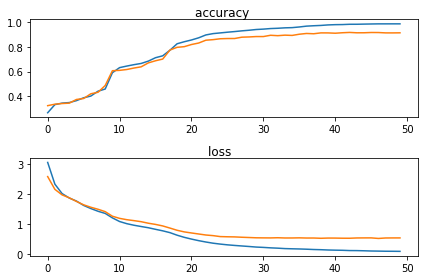

In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
activations = ['relu']
filters = 100
#kernel_sizes = [1, 2, 3, 4, 5, 6]
kernel_sizes = [3]


columns = ['Activation', 'Kernel_Size', 'Acc']
record = pd.DataFrame(columns = columns)

# Separate the sentences and the labels
train_y = y_train
test_y = y_test

exp = 0

for activation in activations:

    for kernel_size in kernel_sizes:
        
        exp+=1
        print('-------------------------------------------')
        print('Training {}: {} activation, {} kernel size.'.format(exp, activation, kernel_size))
        print('-------------------------------------------')
        
        # encode data using
        # Cleaning and Tokenization
        tokenizer = Tokenizer(oov_token=oov_tok)
        tokenizer.fit_on_texts(X_train)

        # Turn the text into sequence
        training_sequences = tokenizer.texts_to_sequences(X_train)
        test_sequences = tokenizer.texts_to_sequences(X_test)

        max_len = max_length(training_sequences)

        # Pad the sequence to have the same size
        Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
        Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

        word_index = tokenizer.word_index
        vocab_size = len(word_index)+1

        # Define the input shape
        model = define_model_biGRU(kernel_size, activation, input_dim=vocab_size, max_length=max_len)

        # Train the model and initialize test accuracy with 0
        acc = 0
        while(acc<0.87):

            history=model.fit(Xtrain, train_y, batch_size=50, epochs=50, verbose=1, 
                      callbacks=[callbacks], validation_data=(Xtest, test_y))

            # evaluate the model
            loss, acc = model.evaluate(Xtest, test_y, verbose=0)
            print('Test Accuracy: {}'.format(acc*100))

            if (acc<0.6):
                print('The model suffered from local minimum. Retrain the model!')
                model = define_model_biGRU(kernel_size, activation, input_dim=vocab_size, max_length=max_len)

            else:
                print('Done!')

                # evaluate the model
        loss, acc = model.evaluate(Xtest, test_y, verbose=0)
        print('Test Accuracy: {}'.format(acc*100))



        kernel = str(kernel_size)
        fig, axs = plt.subplots(2)

        axs[0].plot(history.history['accuracy'], label='train')
        axs[0].plot(history.history['val_accuracy'], label='validation')
        axs[0].set_title('accuracy ', pad=-80)
        axs[1].plot(history.history['loss'], label='train_loss')
        axs[1].plot(history.history['val_loss'], label='val_loss')
        axs[1].set_title('loss  ' , pad=-80)
        fig.tight_layout()  
        fig.savefig(str(perfix2)+str(kernel_size), bbox_inches = "tight")

        # save to csv: 
        hist_csv_file = str(perfix2)+str(kernel_size)+'-learning_rate.csv'
        with open(hist_csv_file, mode='w') as f:
          pd.DataFrame(history.history).to_csv(f)


        parameters = [activation, kernel_size]
        entries = parameters + [acc]

        temp = pd.DataFrame([entries], columns=columns)
        record = record.append(temp, ignore_index=True)
        print()
        print(record)
        print()
 

        test_labels=y_test 


#---------- PRINTING REPORT -----------#

        # predict the probability distribution of the data
        predictions=model.predict(Xtest, steps=51, verbose=1)

        # get the class with highest probability for each sample
        y_pred = np.argmax(predictions, axis=-1)
        print(y_pred)
        # get the classification report


        C_report=classification_report(test_labels, y_pred)
        print(C_report)


        #Pandas format of the report
        report_to_df(C_report, str(kernel_size))
        #Save C_report 


        ## Change name for reference
        text_file = open(perfix2+ str(kernel_size)+".txt", "w")
        n = text_file.write(C_report)
        text_file.close()


        

In [ ]:
vocab_size

16985

In [ ]:
del(history)

# Word2Vec and TCN

In [ ]:
word2vec=joblib.load(prefix+'word2vec-google-news-300.joblib')

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dropout, MaxPool1D, Flatten, Dense, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define a function to compute the max length of sequence
def max_length(sequences):
    '''
    input:
        sequences: a 2D list of integer sequences
    output:
        max_length: the max length of the sequences
    '''
    max_length = 0
    for i, seq in enumerate(sequences):
        length = len(seq)
        if max_length < length:
            max_length = length
    return max_length

In [ ]:
def training_words_in_word2vector(word_to_vec_map, word_to_index):
    '''
    input:
        word_to_vec_map: a word2vec GoogleNews-vectors-negative300.bin model loaded using gensim.models
        word_to_index: word to index mapping from training set
    '''
    
    vocab_size = len(word_to_index) + 1
    count = 0
    # Set each row "idx" of the embedding matrix to be 
    # the word vector representation of the idx'th word of the vocabulary
    for word, idx in word_to_index.items():
        if word in word_to_vec_map:
            count+=1
            
    return print('Found {} words present from {} training vocabulary in the set of pre-trained word vector'.format(count, vocab_size))

In [ ]:
oov_tok = "<UNK>"
# Separate the sentences and the labels
sentences, labels = list(X), list(y)

# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
training_words_in_word2vector(word2vec, word_index)

Found 6376 words present from 18712 training vocabulary in the set of pre-trained word vector


In [ ]:
emb_mean = word2vec.vectors.mean()
emb_std = word2vec.vectors.std()

In [ ]:
from tensorflow.keras.layers import Embedding

def pretrained_embedding_matrix(word_to_vec_map, word_to_index, emb_mean, emb_std):
    '''
    input:
        word_to_vec_map: a word2vec GoogleNews-vectors-negative300.bin model loaded using gensim.models
        word_to_index: word to index mapping from training set
    '''
    np.random.seed(2021)
    
    # adding 1 to fit Keras embedding (requirement)
    vocab_size = len(word_to_index) + 1
    # define dimensionality of your pre-trained word vectors (= 300)
    emb_dim = word_to_vec_map.word_vec('handsome').shape[0]
    
    # initialize the matrix with generic normal distribution values
    embed_matrix = np.random.normal(emb_mean, emb_std, (vocab_size, emb_dim))
    
    # Set each row "idx" of the embedding matrix to be 
    # the word vector representation of the idx'th word of the vocabulary
    for word, idx in word_to_index.items():
        if word in word_to_vec_map:
            embed_matrix[idx] = word_to_vec_map.get_vector(word)
            
    return embed_matrix

In [ ]:
pip install keras-tcn

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 462 kB 49.6 MB/s 


In [ ]:
from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Input, Embedding, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import concatenate, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model

def define_model_2(kernel_size = 3, activation='relu', input_dim = None, 
                   output_dim=300, max_length = None, emb_matrix = None):
    
    inp = Input( shape=(max_length,))
    x = Embedding(input_dim=input_dim, 
                  output_dim=output_dim, 
                  input_length=max_length,
                  # Assign the embedding weight with word2vec embedding marix
                  weights = [emb_matrix],
                  # Set the weight to be not trainable (static)
                  trainable = False)(inp)
    
    x = SpatialDropout1D(0.1)(x)
    
    x = TCN(100,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn1')(x)
    x = TCN(54,dilations = [1, 2, 4], return_sequences=True, activation = activation, name = 'tcn2')(x)
    
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    
    conc = concatenate([avg_pool, max_pool])
    conc = Dense(22, activation="relu")(conc)
    conc = Dropout(0.1)(conc)
    outp = Dense(44, activation="softmax")(conc)    

    model = Model(inputs=inp, outputs=outp)
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [ ]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=20, verbose=2, 
                                             mode='auto', restore_best_weights=True)

In [ ]:
perfix3 = 'drive/MyDrive/Hisham_Ignacio/ICMS_ML/w2vTCN/'

-------------------------------------------
Training 1: relu activation, 1 kernel size.
-------------------------------------------
16800
Epoch 1/50
812/812 [==============================] - 14s 15ms/step - loss: 1.8237 - accuracy: 0.5107 - val_loss: 0.8617 - val_accuracy: 0.7790
Epoch 2/50
812/812 [==============================] - 11s 14ms/step - loss: 0.8690 - accuracy: 0.7658 - val_loss: 0.6080 - val_accuracy: 0.8489
Epoch 3/50
812/812 [==============================] - 11s 14ms/step - loss: 0.6701 - accuracy: 0.8211 - val_loss: 0.5780 - val_accuracy: 0.8525
Epoch 4/50
812/812 [==============================] - 12s 14ms/step - loss: 0.5625 - accuracy: 0.8474 - val_loss: 0.5110 - val_accuracy: 0.8742
Epoch 5/50
812/812 [==============================] - 11s 14ms/step - loss: 0.4807 - accuracy: 0.8689 - val_loss: 0.4902 - val_accuracy: 0.8867
Epoch 6/50
812/812 [==============================] - 12s 14ms/step - loss: 0.4250 - accuracy: 0.8867 - val_loss: 0.4571 - val_accuracy: 0.891

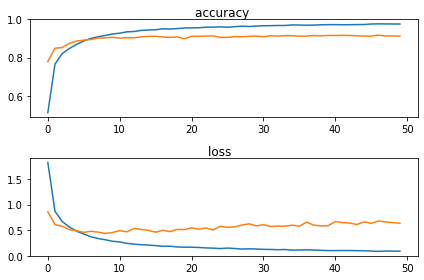

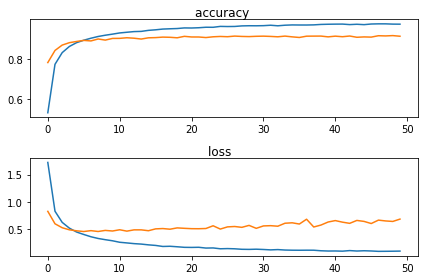

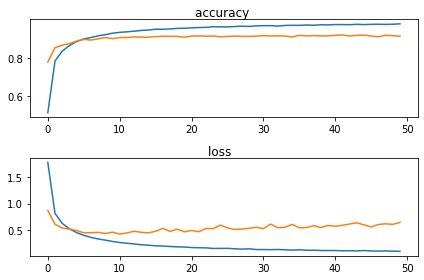

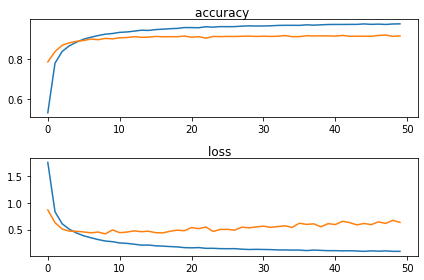

In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
activations = ['relu']
filters = 100
kernel_sizes = [1, 2, 3, 4]
#kernel_sizes = [3]
emb_mean = emb_mean
emb_std = emb_std

columns = ['Activation', 'Filters', 'Acc']
record2 = pd.DataFrame(columns = columns)

train_y = y_train
test_y = y_test

exp = 0

for activation in activations:

    for kernel_size in kernel_sizes:
        
        exp+=1
        print('-------------------------------------------')
        print('Training {}: {} activation, {} kernel size.'.format(exp, activation, kernel_size))
        print('-------------------------------------------')
        
        # encode data using
        # Cleaning and Tokenization
        tokenizer = Tokenizer(oov_token=oov_tok)
        tokenizer.fit_on_texts(X_train)

        # Turn the text into sequence
        training_sequences = tokenizer.texts_to_sequences(X_train)
        test_sequences = tokenizer.texts_to_sequences(X_test)

        max_len = max_length(training_sequences)

        # Pad the sequence to have the same size
        Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
        Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

        word_index = tokenizer.word_index
        vocab_size = len(word_index)+1
        print(vocab_size)

        emb_matrix = pretrained_embedding_matrix(word2vec, word_index, emb_mean, emb_std)

        # Define the input shape
        model = define_model_2(kernel_size, activation, input_dim=vocab_size, 
                             max_length=max_len, emb_matrix=emb_matrix)

        # Train the model and initialize test accuracy with 0
        acc = 0
        while(acc<0.6):

            history=model.fit(Xtrain, train_y, batch_size=50, epochs=50, verbose=1, 
                      callbacks=[callbacks], validation_data=(Xtest, test_y))

            # evaluate the model
            loss, acc = model.evaluate(Xtest, test_y, verbose=0)
            print('Test Accuracy: {}'.format(acc*100))

            if (acc<0.87):
                print('The model suffered from local minimum. Retrain the model!')
                model = define_model_2(kernel_size, activation, input_dim=vocab_size, 
                                       max_length=max_len, emb_matrix=emb_matrix)
            else:
                print('Done!')





                        # evaluate the model
        loss, acc = model.evaluate(Xtest, test_y, verbose=0)
        print('Test Accuracy: {}'.format(acc*100))



        kernel = str(kernel_size)
        fig, axs = plt.subplots(2)

        axs[0].plot(history.history['accuracy'], label='train')
        axs[0].plot(history.history['val_accuracy'], label='validation')
        axs[0].set_title('accuracy ', pad=-80)
        axs[1].plot(history.history['loss'], label='train_loss')
        axs[1].plot(history.history['val_loss'], label='val_loss')
        axs[1].set_title('loss  ' , pad=-80)
        fig.tight_layout()  
        fig.savefig(str(perfix3)+str(kernel_size), bbox_inches = "tight")

        # save to csv: 
        hist_csv_file = str(perfix3)+str(kernel_size)+'-learning_rate.csv'
        with open(hist_csv_file, mode='w') as f:
          pd.DataFrame(history.history).to_csv(f)


        parameters = [activation, kernel_size]
        entries = parameters + [acc]

        temp = pd.DataFrame([entries], columns=columns)
        record2 = record2.append(temp, ignore_index=True)
        print()
        print(record2)
        print()
 

        test_labels=y_test 


#---------- PRINTING REPORT -----------#

        # predict the probability distribution of the data
        predictions=model.predict(Xtest, steps=51, verbose=1)

        # get the class with highest probability for each sample
        y_pred = np.argmax(predictions, axis=-1)
        print(y_pred)
        # get the classification report


        C_report=classification_report(test_labels, y_pred)
        print(C_report)


        #Pandas format of the report
        report_to_df(C_report, str(kernel_size))
        #Save C_report 


        ## Change name for reference
        text_file = open(perfix3+ str(kernel_size)+".txt", "w")
        n = text_file.write(C_report)
        text_file.close()
        parameters = [activation, kernel_size]
        entries = parameters + [acc]

        temp = pd.DataFrame([entries], columns=columns)
        record2 = record2.append(temp, ignore_index=True)
        print()
        print(record2)
        print()

#GRU-W2V

In [ ]:
perfix3 = 'drive/MyDrive/Hisham_Ignacio/ICMS_ML/w2vGRU/'

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm

def define_model_GRU_w2v(input_dim = None, output_dim=300, max_length = None, emb_matrix = None):
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=input_dim, 
                                  output_dim=output_dim, 
                                  input_length=max_length, 
                                  input_shape=(max_length, ),
                                  # Assign the embedding weight with word2vec embedding marix
                                  weights = [emb_matrix],
                                  # Set the weight to be not trainable (static)
                                  trainable = False),
        
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=False)),
#         tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=44, activation='softmax')
    ])
    
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#     model.summary()
    return model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    # Overide the method on_epoch_end() for our benefit
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >= 0.9):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training=True

callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, 
                                             patience=20, verbose=2, 
                                             mode='auto', restore_best_weights=True)

16944
Epoch 1/50
812/812 [==============================] - 34s 34ms/step - loss: 1.2891 - accuracy: 0.6745 - val_loss: 0.6692 - val_accuracy: 0.8280
Epoch 2/50
812/812 [==============================] - 26s 32ms/step - loss: 0.6341 - accuracy: 0.8423 - val_loss: 0.5114 - val_accuracy: 0.8694
Epoch 3/50
812/812 [==============================] - 26s 32ms/step - loss: 0.5018 - accuracy: 0.8755 - val_loss: 0.4401 - val_accuracy: 0.8867
Epoch 4/50
812/812 [==============================] - 26s 32ms/step - loss: 0.4202 - accuracy: 0.8937 - val_loss: 0.4249 - val_accuracy: 0.8920
Epoch 5/50
812/812 [==============================] - 26s 32ms/step - loss: 0.3652 - accuracy: 0.9065 - val_loss: 0.3773 - val_accuracy: 0.9050
Epoch 6/50
812/812 [==============================] - 26s 32ms/step - loss: 0.3214 - accuracy: 0.9179 - val_loss: 0.3756 - val_accuracy: 0.9080
Epoch 7/50
812/812 [==============================] - 26s 32ms/step - loss: 0.2844 - accuracy: 0.9283 - val_loss: 0.3648 - val_acc

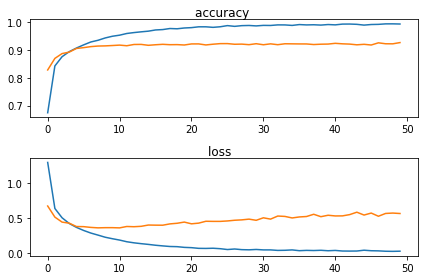

In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
emb_mean = emb_mean
emb_std = emb_std

train_y = y_train
test_y = y_test


# encode data using
# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Turn the text into sequence
training_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

max_len = max_length(training_sequences)

# Pad the sequence to have the same size
Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

word_index = tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)
emb_matrix = pretrained_embedding_matrix(word2vec, word_index, emb_mean, emb_std)

# Define the input shape
model = define_model_GRU_w2v(input_dim=vocab_size, max_length=max_len, emb_matrix=emb_matrix)

# Train the model
history = model.fit(Xtrain, train_y, batch_size=50, epochs=50, verbose=1, 
          callbacks=[callbacks], validation_data=(Xtest, test_y))

# evaluate the model
loss, acc = model.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))


fig, axs = plt.subplots(2)

axs[0].plot(history.history['accuracy'], label='train')
axs[0].plot(history.history['val_accuracy'], label='validation')
axs[0].set_title('accuracy ', pad=-80)
axs[1].plot(history.history['loss'], label='train_loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].set_title('loss  ' , pad=-80)
fig.tight_layout()  
fig.savefig(str(perfix3), bbox_inches = "tight")

# save to csv: 
hist_csv_file = str(perfix3)+'-learning_rate.csv'
with open(hist_csv_file, mode='w') as f:
  pd.DataFrame(history.history).to_csv(f)




test_labels=y_test 


#---------- PRINTING REPORT -----------#

# predict the probability distribution of the data
predictions=model.predict(Xtest, steps=51, verbose=1)

# get the class with highest probability for each sample
y_pred = np.argmax(predictions, axis=-1)
print(y_pred)
# get the classification report


C_report=classification_report(test_labels, y_pred)
print(C_report)


#Pandas format of the report
report_to_df(C_report, str(kernel_size))
#Save C_report 


## Change name for reference
text_file = open(perfix3+".txt", "w")
n = text_file.write(C_report)
text_file.close()



#W2Vec LSTM


In [ ]:
perfix3 = 'drive/MyDrive/Hisham_Ignacio/ICMS_ML/w2vLSTM/'

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.constraints import MaxNorm

def define_model_LSTM_w2v(input_dim = None, output_dim=300, max_length = None, emb_matrix = None):
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=input_dim, 
                                  output_dim=output_dim, 
                                  input_length=max_length, 
                                  input_shape=(max_length, ),
                                  # Assign the embedding weight with word2vec embedding marix
                                  weights = [emb_matrix],
                                  # Set the weight to be not trainable (static)
                                  trainable = False),
        
#         tf.keras.layers.LSTM(units=128, return_sequences=True),
#         tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Bidirectional((tf.keras.layers.LSTM(64))),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=44, activation='softmax')
    ])
    
    model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#     model.summary()
    return model

16944
Epoch 1/50
812/812 [==============================] - 19s 20ms/step - loss: 1.4303 - accuracy: 0.6391 - val_loss: 0.7724 - val_accuracy: 0.7993
Epoch 2/50
812/812 [==============================] - 15s 19ms/step - loss: 0.7503 - accuracy: 0.8069 - val_loss: 0.5945 - val_accuracy: 0.8424
Epoch 3/50
812/812 [==============================] - 15s 19ms/step - loss: 0.6051 - accuracy: 0.8431 - val_loss: 0.5047 - val_accuracy: 0.8651
Epoch 4/50
812/812 [==============================] - 15s 18ms/step - loss: 0.5289 - accuracy: 0.8618 - val_loss: 0.4671 - val_accuracy: 0.8760
Epoch 5/50
812/812 [==============================] - 15s 18ms/step - loss: 0.4683 - accuracy: 0.8760 - val_loss: 0.4295 - val_accuracy: 0.8873
Epoch 6/50
812/812 [==============================] - 15s 18ms/step - loss: 0.4324 - accuracy: 0.8860 - val_loss: 0.4133 - val_accuracy: 0.8915
Epoch 7/50
812/812 [==============================] - 16s 20ms/step - loss: 0.4021 - accuracy: 0.8937 - val_loss: 0.3978 - val_acc

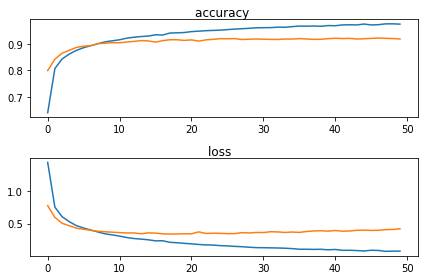

In [ ]:
# Parameter Initialization
trunc_type='post'
padding_type='post'
oov_tok = "<UNK>"
emb_mean = emb_mean
emb_std = emb_std

train_y = y_train
test_y = y_test


# encode data using
# Cleaning and Tokenization
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

# Turn the text into sequence
training_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

max_len = max_length(training_sequences)

# Pad the sequence to have the same size
Xtrain = pad_sequences(training_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
Xtest = pad_sequences(test_sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)

word_index = tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)
emb_matrix = pretrained_embedding_matrix(word2vec, word_index, emb_mean, emb_std)

# Define the input shape
model = define_model_LSTM_w2v(input_dim=vocab_size, max_length=max_len, emb_matrix=emb_matrix)

# Train the model
history = model.fit(Xtrain, train_y, batch_size=50, epochs=50, verbose=1, 
          callbacks=[callbacks], validation_data=(Xtest, test_y))

# evaluate the model
loss, acc = model.evaluate(Xtest, test_y, verbose=0)
print('Test Accuracy: {}'.format(acc*100))


fig, axs = plt.subplots(2)

axs[0].plot(history.history['accuracy'], label='train')
axs[0].plot(history.history['val_accuracy'], label='validation')
axs[0].set_title('accuracy ', pad=-80)
axs[1].plot(history.history['loss'], label='train_loss')
axs[1].plot(history.history['val_loss'], label='val_loss')
axs[1].set_title('loss  ' , pad=-80)
fig.tight_layout()  
fig.savefig(str(perfix3), bbox_inches = "tight")

# save to csv: 
hist_csv_file = str(perfix3)+'-learning_rate.csv'
with open(hist_csv_file, mode='w') as f:
  pd.DataFrame(history.history).to_csv(f)




test_labels=y_test 


#---------- PRINTING REPORT -----------#

# predict the probability distribution of the data
predictions=model.predict(Xtest, steps=51, verbose=1)

# get the class with highest probability for each sample
y_pred = np.argmax(predictions, axis=-1)
print(y_pred)
# get the classification report


C_report=classification_report(test_labels, y_pred)
print(C_report)


#Pandas format of the report
report_to_df(C_report, str(kernel_size))
#Save C_report 


## Change name for reference
text_file = open(perfix3+".txt", "w")
n = text_file.write(C_report)
text_file.close()



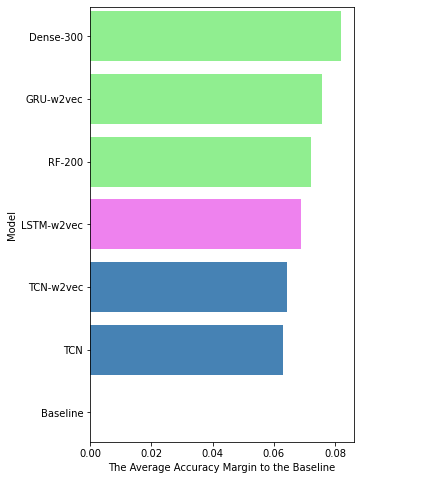

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a dataframe
df = pd.read_excel('Accuracy Summary.xlsx')

# Initialize the column Avg with zeros
df['Avg'] = 0.0
columns = ['TREC']

# Assign the accuracy values from CNN-rand model as the baseline
baseline = df[df['Model']=='Baseline'][columns].values

# Calculate the margin average w.r.t. the baseline
avg = np.sum((df[columns].values - baseline), axis=1)/1

# Update the values in Avg column
df['Avg'] = avg

# Obtain a dataframe with Model and Avg columns
df_model_avg = df[['Model', 'Avg']].sort_values(by='Avg')
df_model_avg = df_model_avg.reset_index(drop=True)

colors = ['steelblue' for _ in range(7)]
for idx, color in enumerate(colors):
    # Benchmark colors
    if (idx>3):
        colors[idx]='lightgreen'
    # Top 5 of the proposed models
    elif (2<idx<4):
        colors[idx] = 'violet'
  
        
# Define the label and values for the horizontal bar
labels = list(df_model_avg.Model.values)
values = df_model_avg.Avg

# Create a frame for the chart to be plotted
plt.figure(figsize=(12/2.54, 8))

# Define the horizontal bar plot
plt.barh(labels, values, color=colors)
plt.xlabel('The Average Accuracy Margin to the Baseline')
plt.ylabel("Model")

# Set the plot margin
plt.margins(x = 0.05, y=0.01)
# plt.grid( axis='y')

for idx, avg in enumerate(df_model_avg['Avg']):
    label = str(round(avg, 2))
    if (idx>10):
        plt.annotate(label, xy=(-0.9, idx-0.18), color='black')
    else:
        plt.annotate(label, xy=(0.1, idx-0.18), color='black')

# Plot the bar
plt.show()